In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('Demo_data.csv')
col = data.columns

In [3]:
features = data[['Age at Admission', 'Sex at Birth', 'Hispanic ethnicity', 'SOFA',
       'WHO Scale',
       'Race_American Indian / Alaska Native', 'Race_Asian',
       'Race_Black / African American',
       'Race_Native Hawaiian / Other Pacific Islander',
       'Race_Other / Multiple Races', 'Race_Unknown', 'Race_White']]


In [4]:
target = data['Delirium at any time during hospitalization']
row_counts = data.count()
features = pd.DataFrame(features)  # Convert to DataFrame if it's a list
print("Features shape:", features.shape)
target = pd.Series(target)


Features shape: (128, 12)


In [5]:
#print(row_counts)
#print(type(target))
#print("Features shape:", features.length)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [6]:
from sklearn.model_selection import cross_val_score

# Example of finding the best K
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())
optimal_k = accuracies.index(max(accuracies)) + 1
print("Optimal K:", optimal_k)


Optimal K: 17


In [7]:
knn_1 = KNeighborsClassifier(n_neighbors=optimal_k, weights= 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#using all of the features the 0.6153846153846154


0.6538461538461539


In [8]:
features_2 = data[['Age at Admission', 'SOFA', 'WHO Scale']]


In [9]:
target = data['Delirium at any time during hospitalization']
row_counts = data.count()
features_2 = pd.DataFrame(features_2)  # Convert to DataFrame if it's a list
print("Features shape:", features_2.shape)
target = pd.Series(target)

Features shape: (128, 3)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(features_2, target, test_size=0.2, random_state=42)


In [11]:
from sklearn.model_selection import cross_val_score

# Example of finding the best K
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())
optimal_k = accuracies.index(max(accuracies)) + 1
print("Optimal K:", optimal_k)


Optimal K: 17


In [12]:
knn_2 = KNeighborsClassifier(n_neighbors=optimal_k, weights= 'distance')
knn_2.fit(X_train, y_train)
y_pred = knn_2.predict(X_test)
#print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6153846153846154


In [15]:
knn_3 = KNeighborsClassifier(n_neighbors=optimal_k, metric='manhattan')
knn_3.fit(X_train, y_train)
y_pred = knn_3.predict(X_test)
#print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6538461538461539


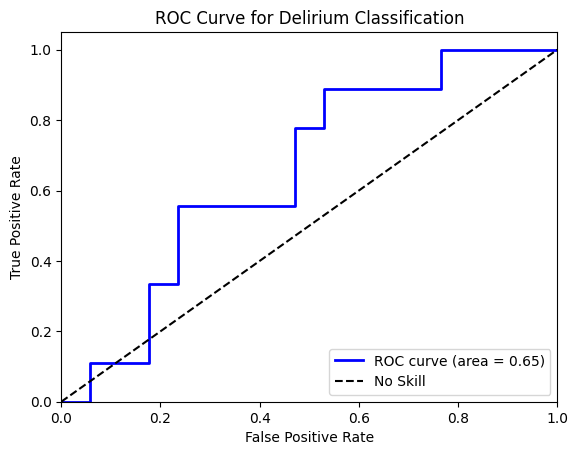

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = knn_2.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Delirium Classification')
plt.legend(loc="lower right")
plt.show()